In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM


In [2]:
data = pd.read_csv("D:\D\PICT\Datasets\goog.csv",thousands=",")
data

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400
...,...,...,...,...,...,...
56,3/13/2017,844.000000,848.684998,843.250000,845.539978,1149500
57,3/14/2017,843.640015,847.239990,840.799988,845.619995,779900
58,3/15/2017,847.590027,848.630005,840.770020,847.200012,1379600
59,3/16/2017,849.030029,850.849976,846.130005,848.780029,970400


Text(0, 0.5, 'Stock Volume')

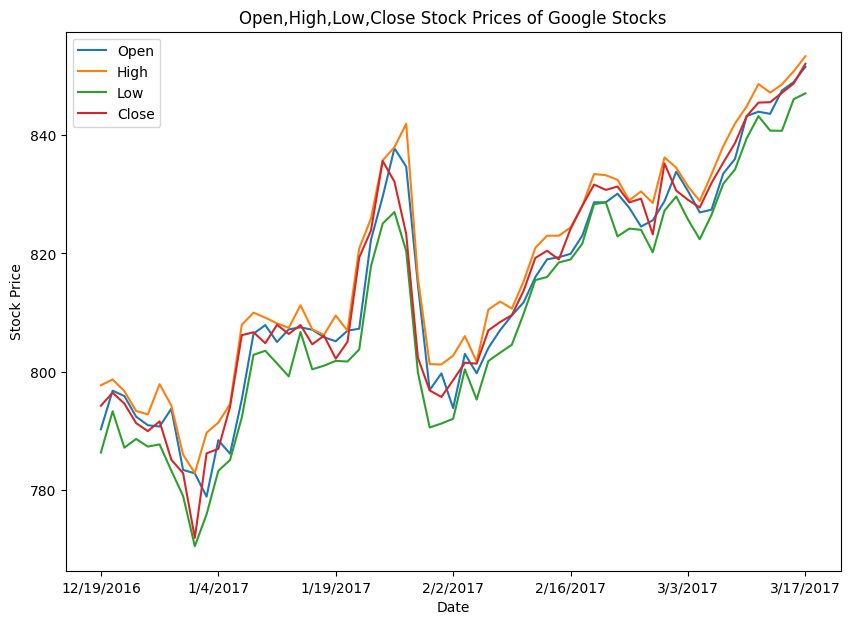

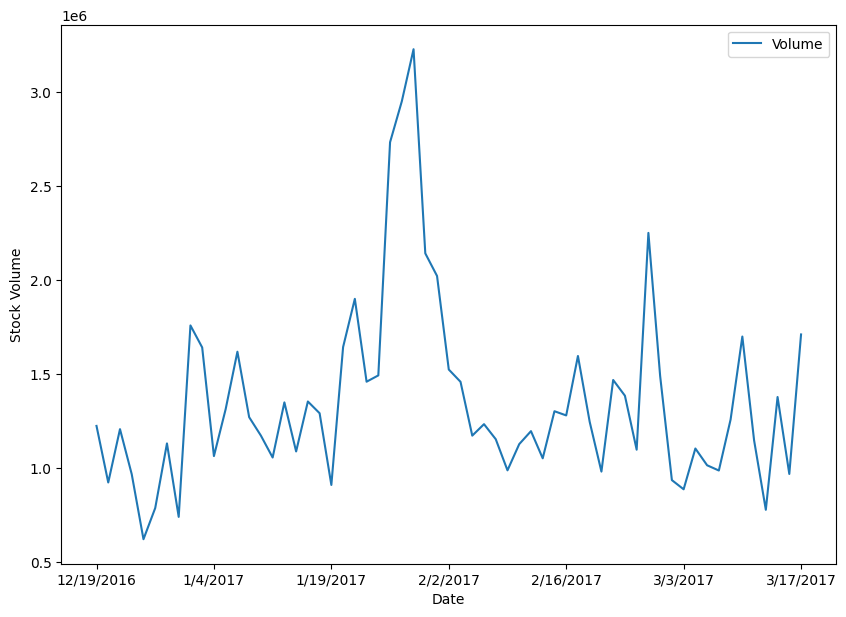

In [3]:
ax1 = data.plot(x="Date", y=["Open","High", "Low","Close"], figsize=(10,7),title='Open,High,Low,Close Stock Prices of Google Stocks')
ax1.set_ylabel("Stock Price")

ax2 = data.plot(x="Date", y=["Volume"],figsize=(10,7))
ax2.set_ylabel("Stock Volume")

In [4]:
data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Open         Axes(0.125,0.11;0.133621x0.77)
High      Axes(0.285345,0.11;0.133621x0.77)
Low        Axes(0.44569,0.11;0.133621x0.77)
Close     Axes(0.606034,0.11;0.133621x0.77)
Volume    Axes(0.766379,0.11;0.133621x0.77)
dtype: object

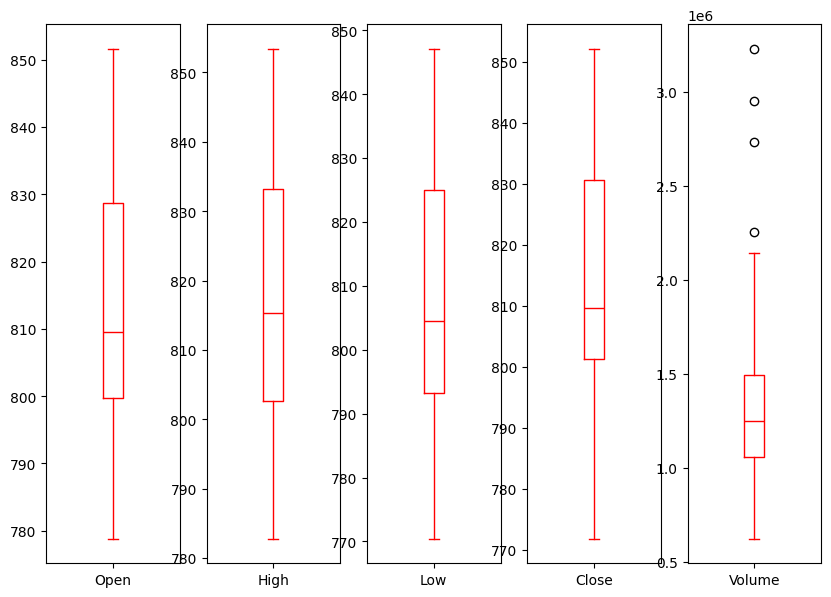

In [5]:
data[["Open","High","Low","Close","Volume"]].plot(kind="box",layout=(1,5),subplots=True, sharex=False,sharey=False,figsize=(10,7),color="red")

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >]], dtype=object)

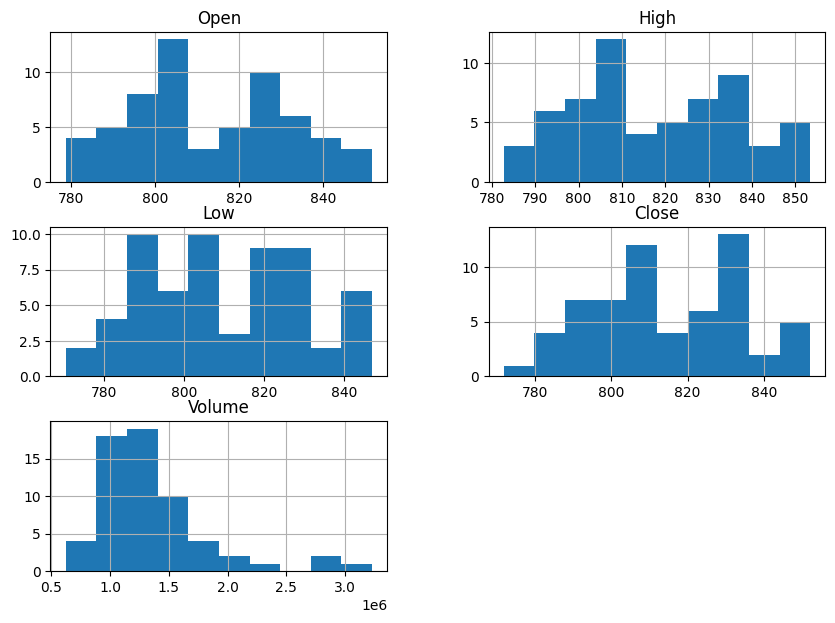

In [6]:
data.hist(figsize=(10,7))

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

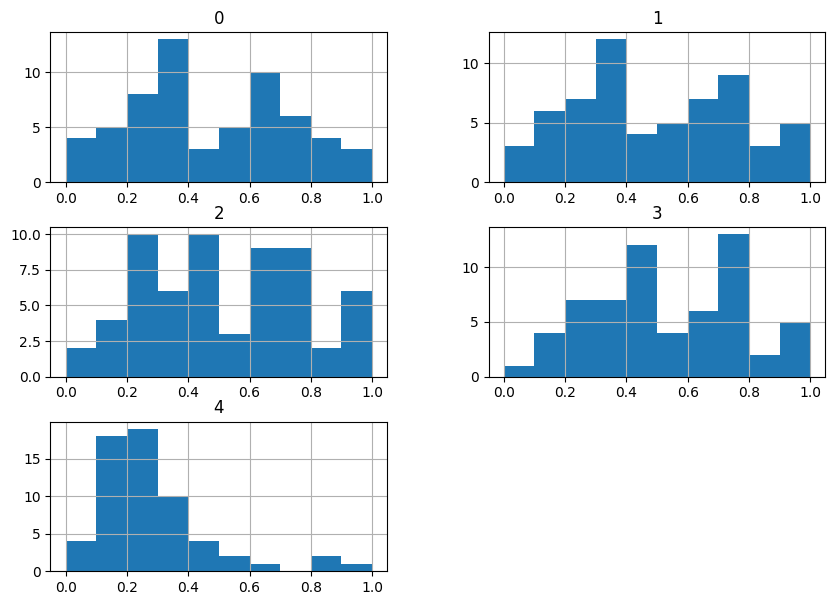

In [7]:
scaler = MinMaxScaler()
data_without_date = data.drop("Date",axis=1)
scaled_data = pd.DataFrame(scaler.fit_transform(data_without_date))

scaled_data.hist(figsize=(10,7))

In [8]:
scaled_data = scaled_data.drop([0,2,3],axis=1)
scaled_data

,1,4
0,0.210704,0.231242
1,0.224724,0.115794
2,0.196771,0.224640
3,0.149249,0.132681
4,0.141036,0.000000
...,...,...
56,0.933234,0.201919
57,0.912772,0.060065
58,0.932455,0.290232
59,0.963891,0.133180


In [9]:
def prepare_dataset(sequence,n_past,n_future):
    x = []
    y = []
    for start in range(len(sequence)):
        past_end = start+n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        past = sequence[start:past_end,:]
        future = sequence[past_end:future_end,-1]
        x.append(past)
        y.append(future)
    return np.array(x),np.array(y)


In [10]:
n_steps = 4
scaled_data = scaled_data.to_numpy()
scaled_data.shape

(61, 2)

In [11]:
x,y = prepare_dataset(scaled_data,n_steps,1)

In [12]:
x.shape,y.shape

((57, 4, 2), (57, 1))

In [13]:
y = y[:,0]
y.shape

(57,)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((45, 4, 2), (12, 4, 2), (45,), (12,))

In [15]:
model = Sequential()
model.add(LSTM(612,input_shape=(n_steps,2)))
model.add(Dense(50,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(1))

c:\Users\adity\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 612)            │     1,505,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        30,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,540,281 (5.88 MB)

 Trainable params: 1,540,281 (5.88 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer="adam",loss="mae",metrics=['mae'])

In [18]:
history = model.fit(x_train,y_train,epochs=50, batch_size=5, validation_data=(x_test,y_test),verbose=2)

Epoch 1/50
9/9 - 2s - 262ms/step - loss: 0.1967 - mae: 0.1967 - val_loss: 0.2313 - val_mae: 0.2313
Epoch 2/50
9/9 - 0s - 20ms/step - loss: 0.1335 - mae: 0.1335 - val_loss: 0.0886 - val_mae: 0.0886
Epoch 3/50
9/9 - 0s - 20ms/step - loss: 0.1300 - mae: 0.1300 - val_loss: 0.1583 - val_mae: 0.1583
Epoch 4/50
9/9 - 0s - 21ms/step - loss: 0.1237 - mae: 0.1237 - val_loss: 0.1039 - val_mae: 0.1039
Epoch 5/50
9/9 - 0s - 19ms/step - loss: 0.1267 - mae: 0.1267 - val_loss: 0.1295 - val_mae: 0.1295
Epoch 6/50
9/9 - 0s - 22ms/step - loss: 0.1234 - mae: 0.1234 - val_loss: 0.1227 - val_mae: 0.1227
Epoch 7/50
9/9 - 0s - 23ms/step - loss: 0.1237 - mae: 0.1237 - val_loss: 0.1106 - val_mae: 0.1106
Epoch 8/50
9/9 - 0s - 20ms/step - loss: 0.1204 - mae: 0.1204 - val_loss: 0.1381 - val_mae: 0.1381
Epoch 9/50
9/9 - 0s - 19ms/step - loss: 0.1161 - mae: 0.1161 - val_loss: 0.0928 - val_mae: 0.0928
Epoch 10/50
9/9 - 0s - 19ms/step - loss: 0.1274 - mae: 0.1274 - val_loss: 0.1190 - val_mae: 0.1190
Epoch 11/50
9/9 - 

<Axes: >

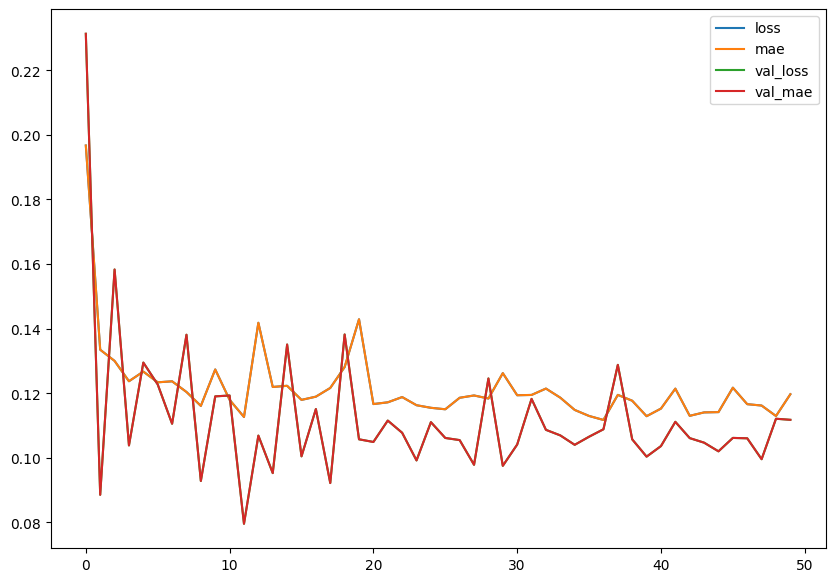

In [19]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [20]:
model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1118 - mae: 0.1118


[0.11178459972143173, 0.11178459972143173]

In [21]:
predictions = model.predict(x_test)
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


(12, 1)

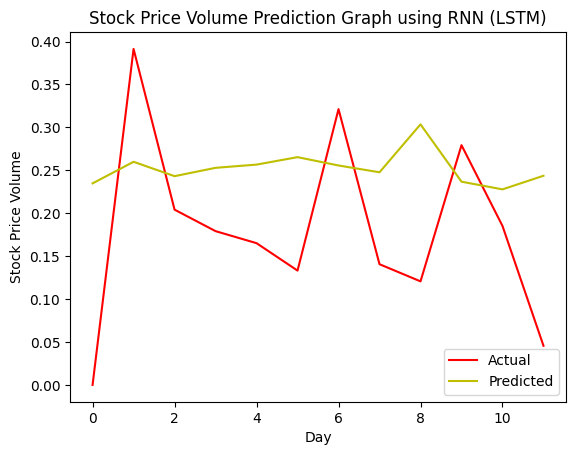

<Figure size 1000x700 with 0 Axes>

In [22]:
plt.plot(y_test, c = 'r')
plt.plot(predictions, c = 'y')
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'], loc = 'lower right')
plt.figure(figsize=(10,7))
plt.show()